# Analyse en composantes principales #
## I) Introduction ##
Principal component analysis (PCA) est un outil qui permet de trouver des relations importantes dans les données et de rajouter des features plus importantes.

Cette méthode d'analyse de données consiste à transformer des variables qui sont corrélées en nouvelles variables décorrélées les unes des autres. Ces nouvelles variables sont nommées <strong>composantes principales</strong>. Elle permet de réduire le nombre de variables et de rendre l'information moins redondante.

## II) Les données
Cet exercice est basé sur un data test qui contient des données automobile. On cherche de quelle manière et surtout quelles caractéristiques influent sur le prix d'une voiture.

## Contexte
Nous allons, au cours de cet exercice, isoler des données qui sont fortement corrélées à la variable que nous cherchons. 
Cela va nous permettre d'avoir un aperçu des données qui sont pertinantes et celles qui ne le sont pas.
Enfin, en fonction de leur pertinance entre elles, nous allons pouvoir regrouper ces données sous une nouvelle caractéristique.

## III) Setup
Run la cellule suivante pour setup le système, importer les données et les standardiser

In [16]:
# Setup system
import pandas as pd
import numpy as np

from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn import preprocessing as prepro

# Import data
df = pd.read_csv("Automobile_data.csv")

# Standardize
df.dropna()

df = df[df["normalized-losses"] != "?"]
le = prepro.LabelEncoder()

le.fit(df.price)
df.price = le.transform(df.price)

le.fit(df.horsepower)
df.horsepower = le.transform(df.horsepower)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,2,5500,24,30,25
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,8,5500,18,22,42
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,4,5500,19,25,44
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,15,5500,17,20,60
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,1,5800,23,29,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,7,5400,23,28,38
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,22,5300,19,25,52
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,13,5500,18,23,56
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,3,4800,26,27,58


## IV) Choisir les features 
Pour choisir les features, il faut prendre celles qui ont une forte correlation avec la target (`Price` ici)

In [17]:
# Complete with 4 features 

features = [
    #...,
    #...,
    #...,
    #...,
]

In [4]:
#IV_solution() #un exemple de solution

## V) Standardiser
Les données des features ne sont pas forcément sur la même échelle par défautl. Il faut donc les standardiser.

<strong>Code :</strong>
```python
X = df.copy()
y = X.pop(~~target~~)
X = X.loc[:, features]

# Standardize with same scale
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

```

In [18]:
# à completer ici pour passer les données sur la même échelle

In [6]:
#V_solution() #solution

## VI) Composantes principales

On peut maintenant à l'aide de la fonction ```fit_transform``` de ```scikit-learn's``` calculer les composantes principales des données sélectionnées.

In [19]:
# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head() 

,PC1,PC2,PC3,PC4
0,0.399491,-1.663393,0.097344,-0.126416
1,1.967130,-0.816074,-0.460339,-0.143930
2,1.835322,-1.015616,-0.005821,0.007853
3,2.202958,-0.344582,-0.874640,0.301558
4,0.556250,-1.717534,-0.009193,-0.054153


## Loadings

Les loadings correspondent au nombres que nous obtenons lorsque nous mettons en relation nos variables avec les Composantes Principales que nous avont calculé.
Plus un chiffre est proche de 1 plus la direction de la Composante Principale est proche de notre variable. En revanche, quand le chiffre est proche de 0, la direction de la Composante principale est perpendiculaire à notre variable. 
Quand la direction de la Composante principale est perpendiculaire, c'est que la variable est très peu corrélé avec.

In [20]:
# Create loadings
loadings = pd.DataFrame(
    pca.components_.T,    #transpose the matrix of loading
    columns=component_names,    # columns are principal components
    index=X.columns,    # rows are original features
)

loadings

,PC1,PC2,PC3,PC4
highway-mpg,-0.532996,0.069264,0.800762,0.264382
engine-size,0.529329,0.374257,0.507392,-0.567711
horsepower,-0.331804,0.893787,-0.301570,0.010320
curb-weight,0.570642,0.237231,0.101927,0.779551


## Visualisation
Comme dit précédement, le but de l'analyse en composantes principales est d'extraire le maximum de données d'un data set tout en minimisant le nombre de variables de celui-ci.

Grâce à la commande suivante ci-dessous, nous pouvons afficher la variance de nos Composantes principale. 
```python
plot_variance(pca)
```
Nous pouvons voir quand ne gardant uniquement 3 variables **(PC1,PC2 et PC3)**, nous conservont environ 95% des information. Nous reduisons donc notre data set à 3 variables et ne perdons que 5% de l'information.

De la même manière, nous pouvons remarquer que les **PC1** et **PC2** conservent ~90% de l'informations à elles seules.

Le nombre de variables à garder va dépendre du traitement que l'on souhaite faire et du pourcentage d'information que l'on souhaite conserver.

array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

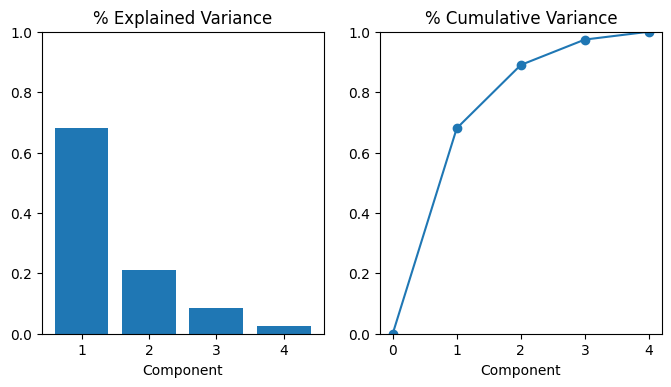

In [30]:
plot_variance(pca)

In [ ]:
def IV_solution():
    print("# IV Solution : \n")
    print("features = [\"highway-mpg\", \"engine-size\", \"horsepower\", \"curb-weight\"]\n")
    print("print(\"Correlation with Price:\")")
    print("df[features].corrwith(df.price)")
    
IV_solution()

# IV Solution : 

features = ["highway-mpg", "engine-size", "horsepower", "curb-weight"]

print("Correlation with Price:")
df[features].corrwith(df.price)


In [ ]:
def V_solution():
    print("# V Solution :\n")
    
    print("X = df.copy()")
    print("y = X.pop('price')")
    print("X = X.loc[:, features]\n")

    print("# Standardize with same scale")
    print("X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)")

    print("X_scaled")
    
V_solution()

# V Solution :

X = df.copy()
y = X.pop('price')
X = X.loc[:, features]

# Standardize with same scale
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)
X_scaled
